In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Path to your Excel file
file_path = './UPDATED_NM student infractions 2010-2022.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the DataFrame
print(df)

                   District Name  District Code  \
0       ABQ SCHOOL OF EXCELLENCE            516   
1       ABQ SCHOOL OF EXCELLENCE            516   
2       ABQ SCHOOL OF EXCELLENCE            516   
3       ABQ SCHOOL OF EXCELLENCE            516   
4       ABQ SCHOOL OF EXCELLENCE            516   
...                          ...            ...   
285912                      ZUNI             89   
285913                      ZUNI             89   
285914                      ZUNI             89   
285915                      ZUNI             89   
285916                      ZUNI             89   

       Location Organization Type Code School Year Student Grade Level  \
0                              Charter  2014-06-30                   8   
1                              Charter  2014-06-30                   8   
2                              Charter  2014-06-30                   8   
3                              Charter  2014-06-30                   8   
4                

In [6]:
column_names = df.columns
print(column_names)

Index(['District Name', 'District Code', 'Location Organization Type Code',
       'School Year', 'Student Grade Level', 'Infraction Event ID',
       'Discipline Infraction Date', 'Discipline Infraction Code',
       'Discipline Infraction', 'Drug Related', 'Alcohol Related',
       'Gang Related', 'Hate Crime', 'Serious Injury', 'Criminal Charge Code',
       'Repeat Offender', 'Discipline Response Code', 'Discipline Response',
       'Discipline Response Duration', 'Admin First Name', 'Admin Last Name',
       'Admin License Number', 'Student Gender Code',
       'Student Race Ethnicity Derived', 'Student Hispanic Indicator',
       'Special Ed Status Code', 'Gifted Participation Code', 'Immigrant',
       'Food Program Participation Code', 'Section 504 Status', 'R3', 'W1',
       'W2', 'W4', 'W5', 'WD', 'WDO', 'WG', 'WC', 'Race Initials'],
      dtype='object')


In [18]:
repeat_counts = df['Repeat Offender'].value_counts()
print(race_counts)

Repeat Offender
N    179211
Y    106706
Name: count, dtype: int64


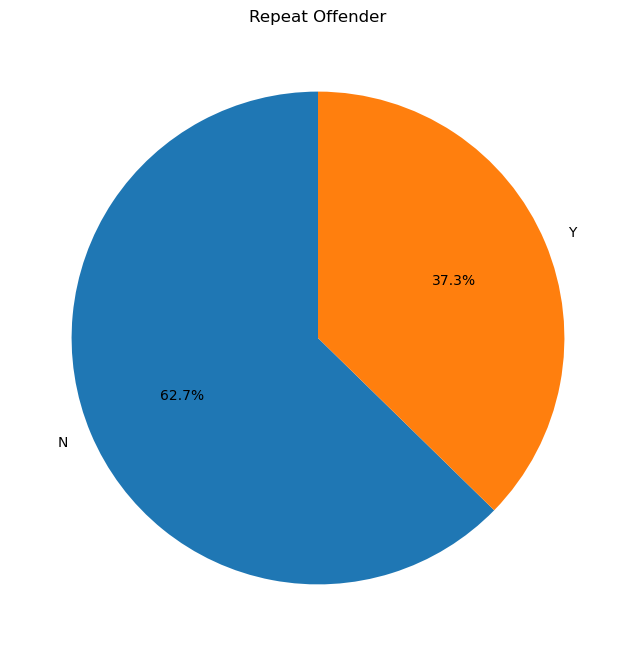

In [19]:
import matplotlib.pyplot as plt

# Assuming drug_related is your Series from the previous step
repeat_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Repeat Offender')
plt.ylabel('')  # Hide the y-label
plt.show()


Investigate the factors unique to middle school that contribute to the increase in infractions among sixth graders compared to fifth graders in elementary school.

In [15]:
# Assuming df['Student Grade Level'] contains the grade levels as shown previously
grade_counts = df['Student Grade Level'].value_counts()

# Define the correct order for the grade levels
grade_order = ['PK', 'KF', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'OS']

# Convert the grade levels in the index to a Categorical type with the defined order
grade_counts.index = pd.Categorical(grade_counts.index, categories=grade_order, ordered=True)

# Sort the Series by its index
sorted_grade_counts = grade_counts.sort_index()

print(sorted_grade_counts)


PK      862
KF     4749
1      6359
2      6732
3      7849
4      9322
5     11651
6     35301
7     44601
8     45976
9     46487
10    33491
11    20416
12    12111
OS       10
Name: count, dtype: int64


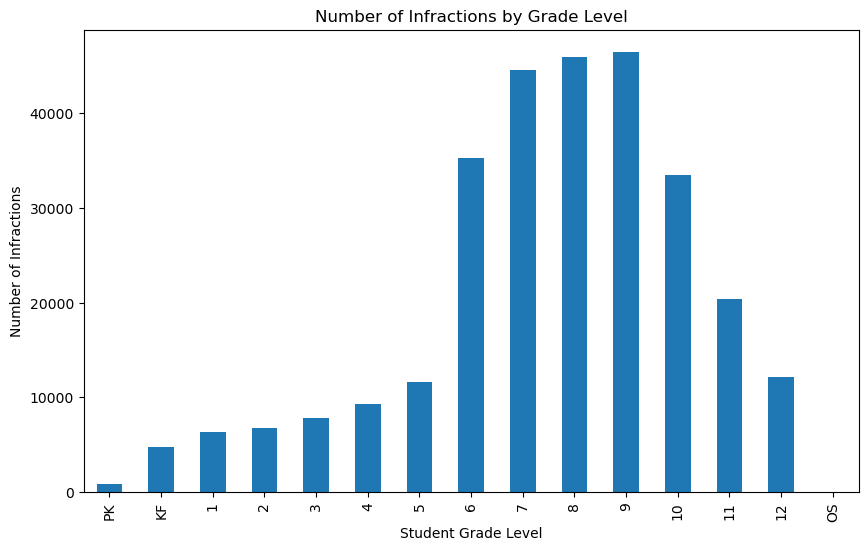

In [16]:
import matplotlib.pyplot as plt

# Assuming sorted_grade_counts is your sorted Series from the previous step
sorted_grade_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Student Grade Level')
plt.ylabel('Number of Infractions')
plt.title('Number of Infractions by Grade Level')
plt.show()


Address potential racial biases in disciplinary actions, particularly the disproportionate arrest rates of Native Hawaiians.

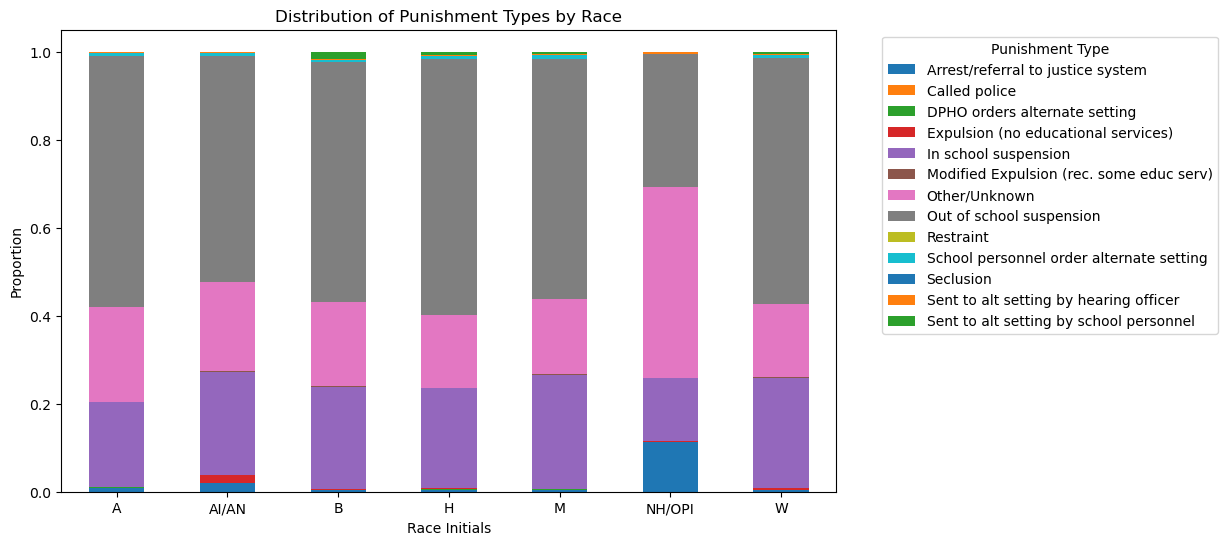

In [4]:
# Map race names to initials
race_initials = {
    'Caucasian': 'W',
    'Black or African American': 'B',
    'Hispanic': 'H',
    'American Indian/Alaskan Native': 'AI/AN',
    'Multiracial': 'M',
    'Native Hawaiian or Other Pacific Islander': 'NH/OPI',
    'Asian': 'A',
    
    
}           

# Add a new column with race initials
df['Race Initials'] = df['Student Race Ethnicity Derived'].map(race_initials)

# Group by Race Initials and Punishment Type, and count the occurrences
punishment_counts = df.groupby(['Race Initials', 'Discipline Response']).size().unstack(fill_value=0)

# Normalize the counts by the total number of infractions for each race
normalized_counts = punishment_counts.div(punishment_counts.sum(axis=1), axis=0)

# Plotting
normalized_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Punishment Types by Race')
plt.xlabel('Race Initials')
plt.ylabel('Proportion')
plt.legend(title='Punishment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

Implement more effective policies to prevent drug-related incidents, which constitute a significant portion of serious infractions.

In [9]:
Discipline_Infraction_counts = df['Discipline Infraction'].value_counts()
print(Discipline_Infraction_counts)

Discipline Infraction
Disorderly Conduct                                                                     86323
Assault/battery with hands/feet/fist                                                   50429
Drug Violation                                                                         36125
Assault/battery simple                                                                 35213
Tobacco Use                                                                            13339
Other Violence - General                                                               11178
Bullying                                                                                7391
Missing Property/Theft                                                                  6767
Sexual Harassment                                                                       5586
Bullying or Harassment NOT based on sex/race/color/national origin or disability        5507
Weapons Possession - Knife/Cutting              

In [10]:
drug_related = df['Drug Related'].value_counts()
print(drug_related)

Drug Related
No     247089
Yes     38828
Name: count, dtype: int64


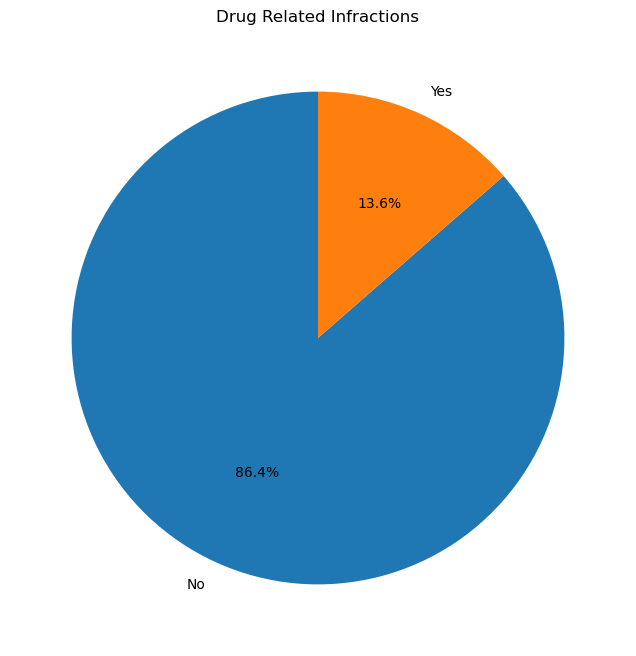

In [17]:
import matplotlib.pyplot as plt

# Assuming drug_related is your Series from the previous step
drug_related.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Drug Related Infractions')
plt.ylabel('')  # Hide the y-label
plt.show()

In [20]:
# Group by gender and infraction type, and count the occurrences
grouped_data = df.groupby(['Student Gender Code', 'Discipline Infraction']).size().unstack().fillna(0)

# Get the top 10 crimes for each gender
top_crimes_by_gender = {}
for gender in grouped_data.index:
    top_crimes_by_gender[gender] = grouped_data.loc[gender].nlargest(20)

# Display the top 10 crimes for each gender
for gender, top_crimes in top_crimes_by_gender.items():
    print(f"Gender: {gender}")
    print(top_crimes)
    print()

Gender: F
Discipline Infraction
Disorderly Conduct                                                                  25256.0
Assault/battery with hands/feet/fist                                                15030.0
Drug Violation                                                                      11301.0
Assault/battery simple                                                              10398.0
Tobacco Use                                                                          3416.0
Other Violence - General                                                             2992.0
Bullying                                                                             2439.0
Missing Property/Theft                                                               2124.0
Bullying or Harassment NOT based on sex/race/color/national origin or disability     1790.0
Alcohol Violation - Use                                                              1506.0
Weapons Possession - Knife/Cutting              

In [23]:
# Get the top 5 most incident schools
top_schools = df['District Name'].value_counts().head(5).index

# Filter the DataFrame to include only data for the top 5 schools
top_schools_df = df[df['District Name'].isin(top_schools)]

# Group by district name and infraction type, and count the occurrences
grouped_data = top_schools_df.groupby(['District Name', 'Discipline Infraction']).size().unstack().fillna(0)

# Get the top 5 infractions for each school
top_infractions_by_district = {}
for district in top_schools:
    top_infractions_by_district[district] = grouped_data.loc[district].nlargest(5)

# Display the top 5 infractions for each school
for district, top_infractions in top_infractions_by_district.items():
    print(f"District: {district}")
    print(top_infractions)
    print()

District: ALBUQUERQUE
Discipline Infraction
Assault/battery with hands/feet/fist    25305.0
Assault/battery simple                  14301.0
Disorderly Conduct                      11545.0
Drug Violation                          11394.0
Bullying                                 3728.0
Name: ALBUQUERQUE, dtype: float64

District: CLOVIS
Discipline Infraction
Disorderly Conduct                      20513.0
Assault/battery with hands/feet/fist     4201.0
Drug Violation                            584.0
Tobacco Use                               566.0
Vandalism                                 402.0
Name: CLOVIS, dtype: float64

District: GALLUP
Discipline Infraction
Disorderly Conduct                      19016.0
Assault/battery simple                   2516.0
Drug Violation                           2221.0
Other Violence - General                 1661.0
Assault/battery with hands/feet/fist      490.0
Name: GALLUP, dtype: float64

District: LAS CRUCES
Discipline Infraction
Disorderly Conduct  

In [25]:
def top_infractions_with_privacy(df, epsilon=1.0):
    """
    Returns the top 5 infractions for the top 5 schools in the DataFrame, with differential privacy applied.
    
    Parameters:
    - df: DataFrame containing the school data.
    - epsilon: Privacy budget for differential privacy. Lower values mean more privacy.
    """
    # Group by district name and get the count of incidents for each school
    school_counts = df.groupby('District Name').size()

    # Add Laplace noise to the count of incidents for each school
    noise_scale = 1/epsilon
    noisy_counts = school_counts + np.random.laplace(0, noise_scale, size=len(school_counts))

    # Get the top 5 most incident schools based on noisy counts
    top_schools = noisy_counts.nlargest(5).index

    # Filter the DataFrame to include only data for the top 5 schools
    top_schools_df = df[df['District Name'].isin(top_schools)]

    # Group by district name and infraction type, and count the occurrences
    grouped_data = top_schools_df.groupby(['District Name', 'Discipline Infraction']).size().unstack().fillna(0)

    # Get the top 5 infractions for each school
    top_infractions_by_district = {}
    for district in top_schools:
        top_infractions_by_district[district] = grouped_data.loc[district].nlargest(5)

    return top_infractions_by_district

In [31]:
for i in range(10):
    print(f"Trial {i+1}:")
    top_infractions = top_infractions_with_privacy(df, epsilon=1.0)
    for district, infractions in top_infractions.items():
        print(f"District: {district}")
        print(infractions)
        print("--------------------------")

Trial 1:
District: ALBUQUERQUE
Discipline Infraction
Assault/battery with hands/feet/fist    25305.0
Assault/battery simple                  14301.0
Disorderly Conduct                      11545.0
Drug Violation                          11394.0
Bullying                                 3728.0
Name: ALBUQUERQUE, dtype: float64
--------------------------
District: CLOVIS
Discipline Infraction
Disorderly Conduct                      20513.0
Assault/battery with hands/feet/fist     4201.0
Drug Violation                            584.0
Tobacco Use                               566.0
Vandalism                                 402.0
Name: CLOVIS, dtype: float64
--------------------------
District: GALLUP
Discipline Infraction
Disorderly Conduct                      19016.0
Assault/battery simple                   2516.0
Drug Violation                           2221.0
Other Violence - General                 1661.0
Assault/battery with hands/feet/fist      490.0
Name: GALLUP, dtype: float64
---

District: ALBUQUERQUE
Discipline Infraction
Assault/battery with hands/feet/fist    25305.0
Assault/battery simple                  14301.0
Disorderly Conduct                      11545.0
Drug Violation                          11394.0
Bullying                                 3728.0
Name: ALBUQUERQUE, dtype: float64
--------------------------
District: CLOVIS
Discipline Infraction
Disorderly Conduct                      20513.0
Assault/battery with hands/feet/fist     4201.0
Drug Violation                            584.0
Tobacco Use                               566.0
Vandalism                                 402.0
Name: CLOVIS, dtype: float64
--------------------------
District: GALLUP
Discipline Infraction
Disorderly Conduct                      19016.0
Assault/battery simple                   2516.0
Drug Violation                           2221.0
Other Violence - General                 1661.0
Assault/battery with hands/feet/fist      490.0
Name: GALLUP, dtype: float64
------------